# 基于 dmc620 的实时内存带宽测量

`perf stat` 输出文件的路径

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
files = os.listdir(("../data/csv/dmc_620/"))
print(files)

['500.perlbench_r_iter0_1732726637.csv', '500.perlbench_r_iter0_1732726864.csv', '500.perlbench_r_iter0_1732726973.csv', '502.gcc_r_iter0_1732729258.csv', '502.gcc_r_iter0_1732729345.csv', '502.gcc_r_iter0_1732729463.csv', '502.gcc_r_iter0_1732729593.csv', '502.gcc_r_iter0_1732729736.csv', '503.bwaves_r_iter0_1732756031.csv', '503.bwaves_r_iter0_1732756430.csv', '503.bwaves_r_iter0_1732757065.csv', '503.bwaves_r_iter0_1732757570.csv', '505.mcf_r_iter0_1732732987.csv', '507.cactuBSSN_r_iter0_1732763198.csv', '508.namd_r_iter0_1732765192.csv', '510.parest_r_iter0_1732768188.csv', '511.povray_r_iter0_1732775012.csv', '519.lbm_r_iter0_1732778962.csv', '520.omnetpp_r_iter0_1732738175.csv', '521.wrf_r_iter0_1732787811.csv', '523.xalancbmk_r_iter0_1732742640.csv', '525.x264_r_iter0_1732744818.csv', '525.x264_r_iter0_1732744864.csv', '525.x264_r_iter0_1732744989.csv', '526.blender_r_iter0_1732792925.csv', '527.cam4_r_iter0_1732794948.csv', '531.deepsjeng_r_iter0_1732746289.csv', '538.imagick_r

C:\Users\ERQI\AppData\Local\Temp\ipykernel_12728\3239776346.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


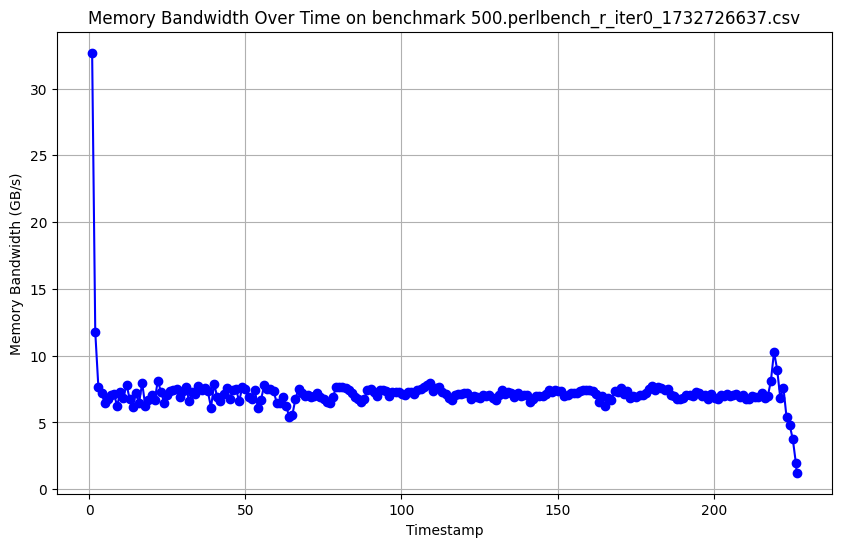

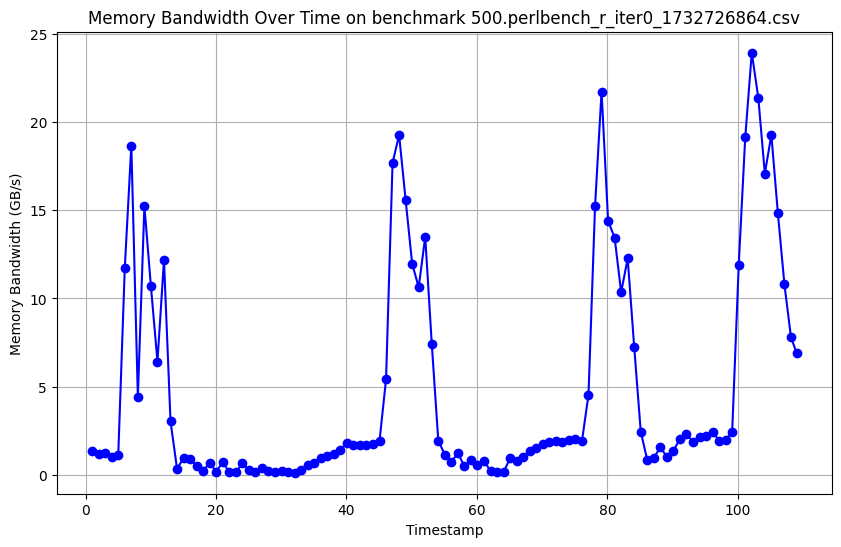

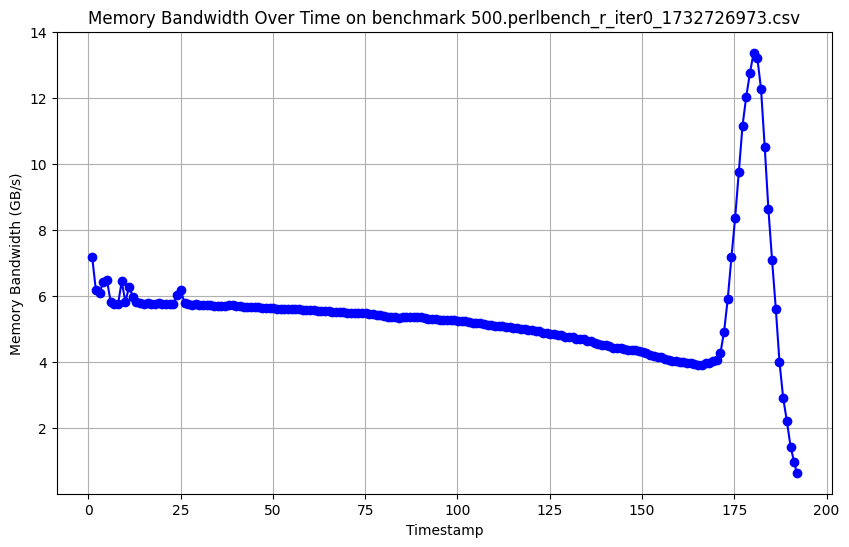

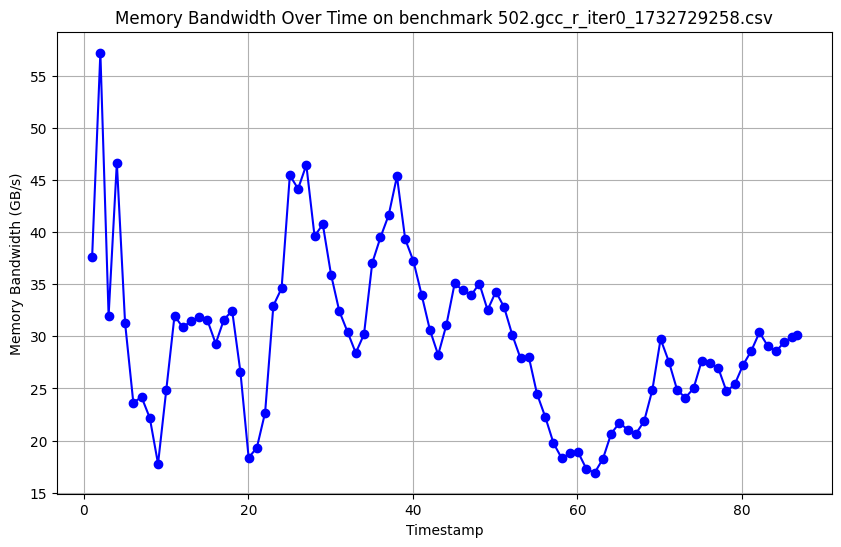

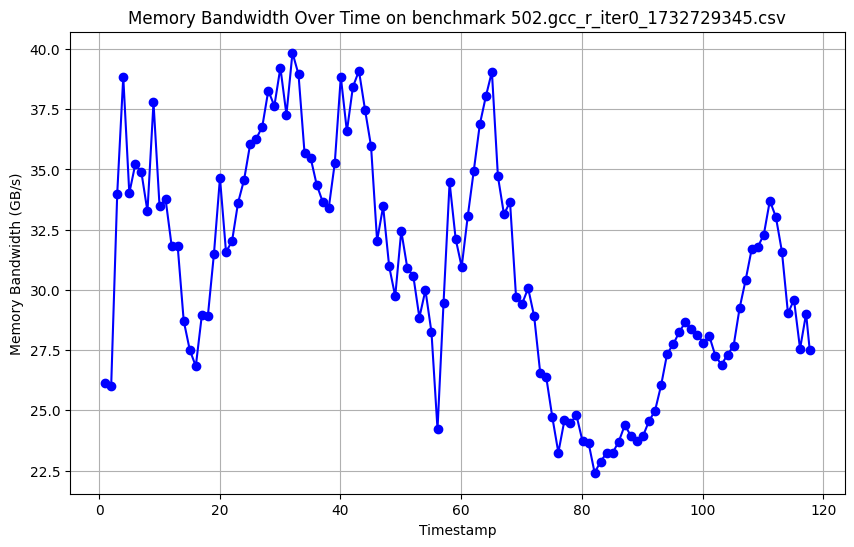

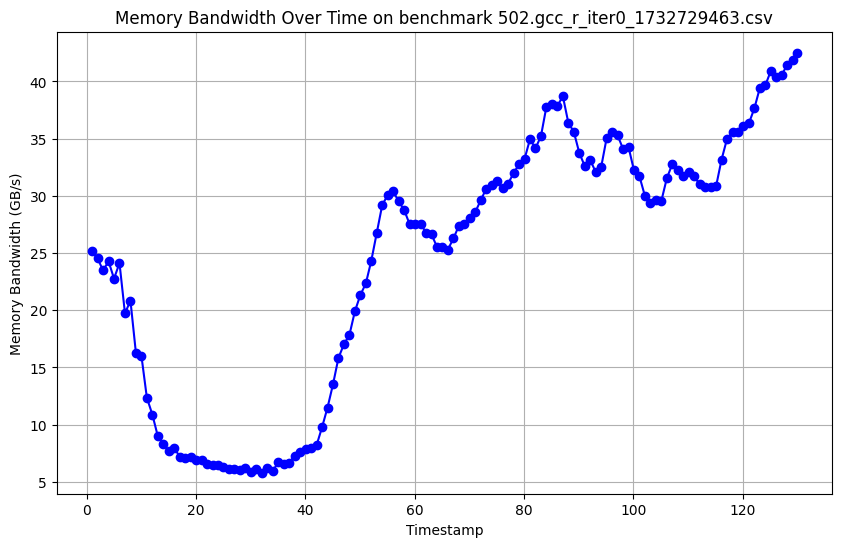

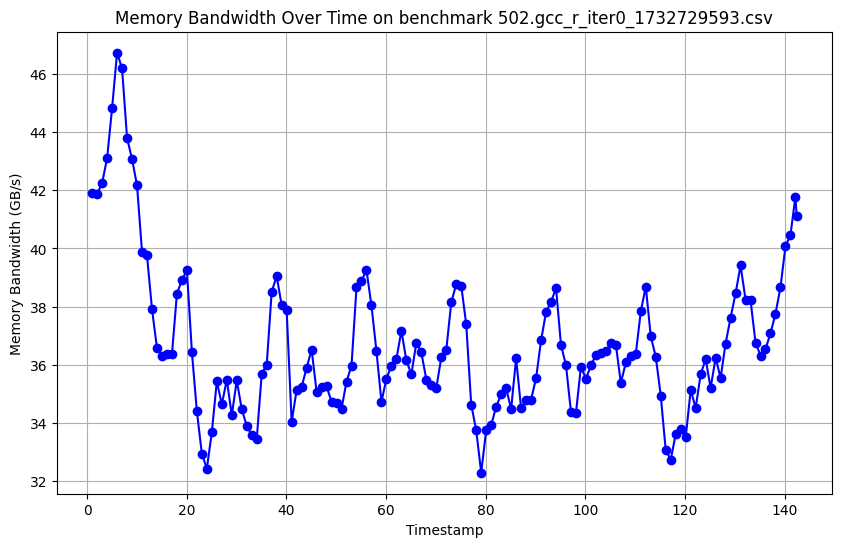

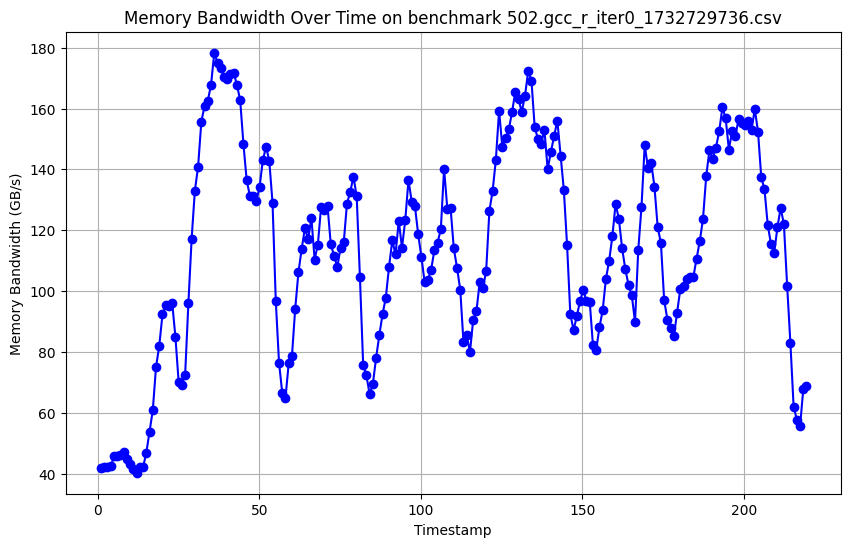

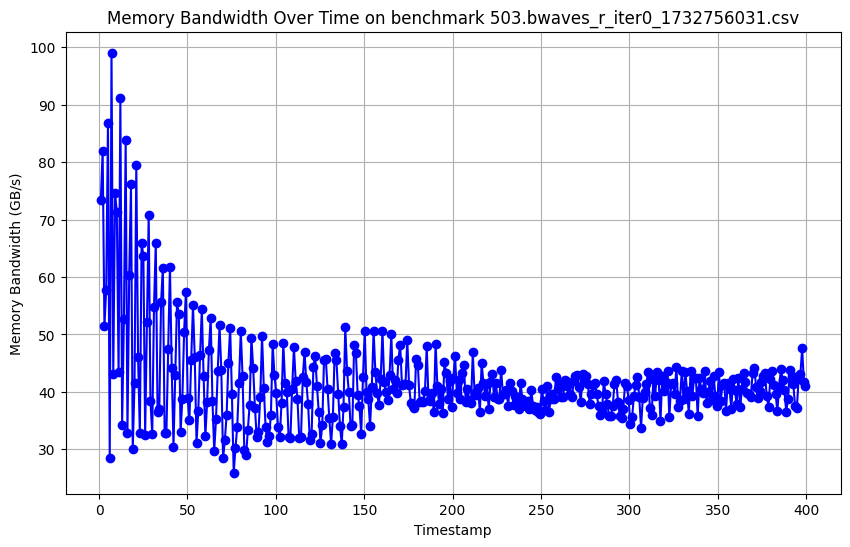

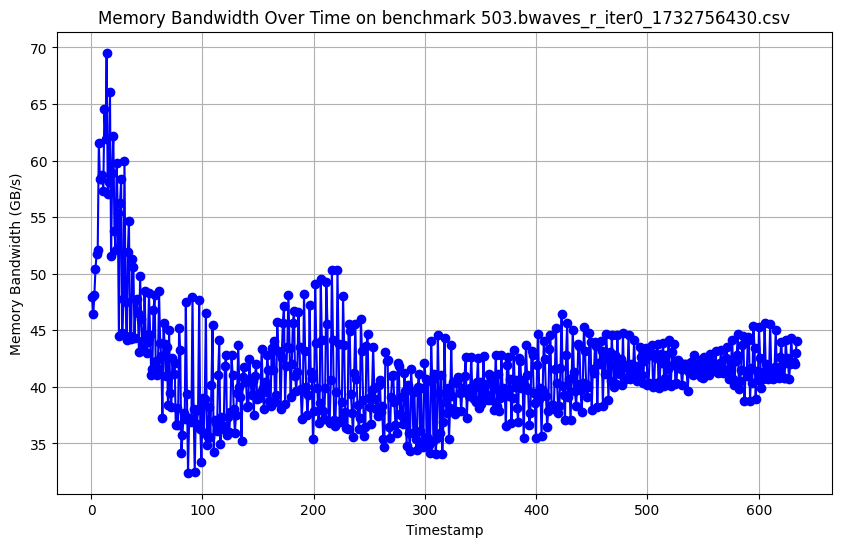

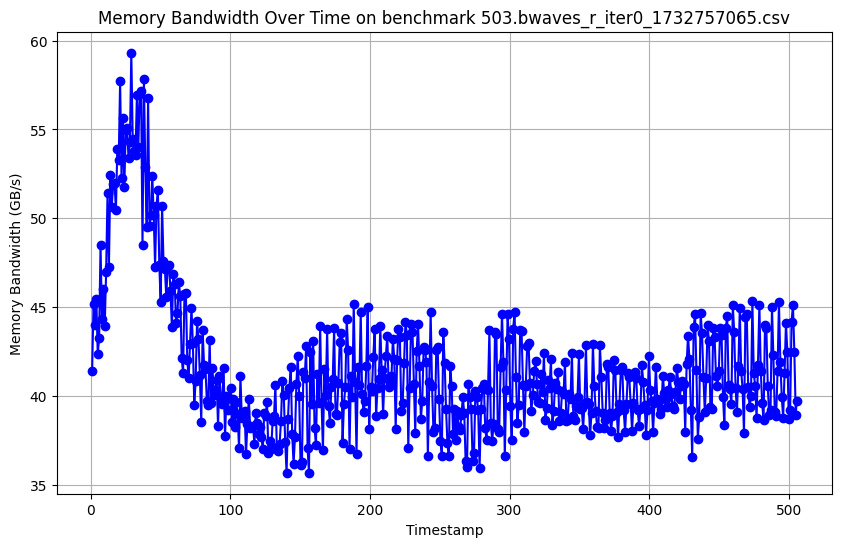

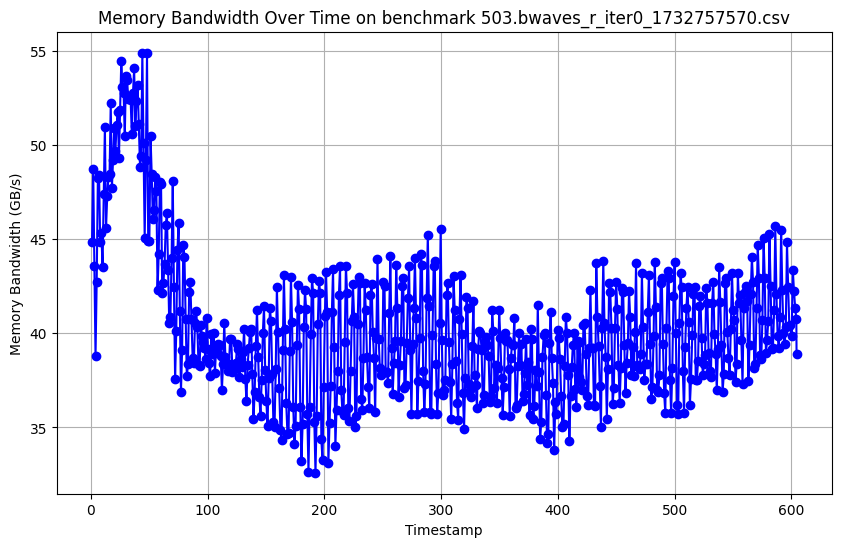

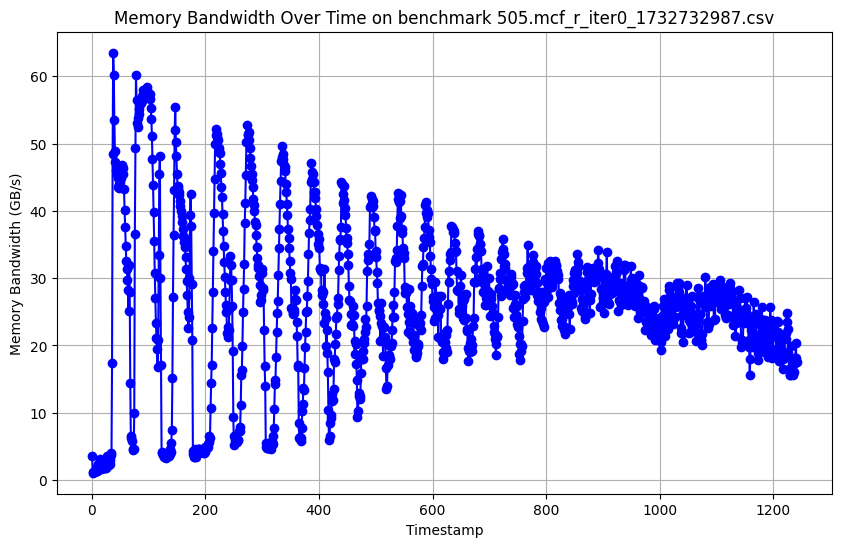

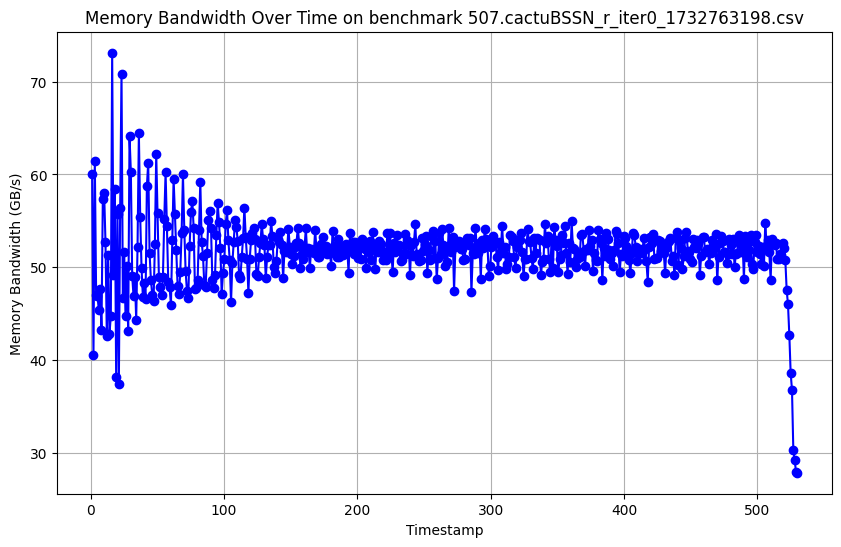

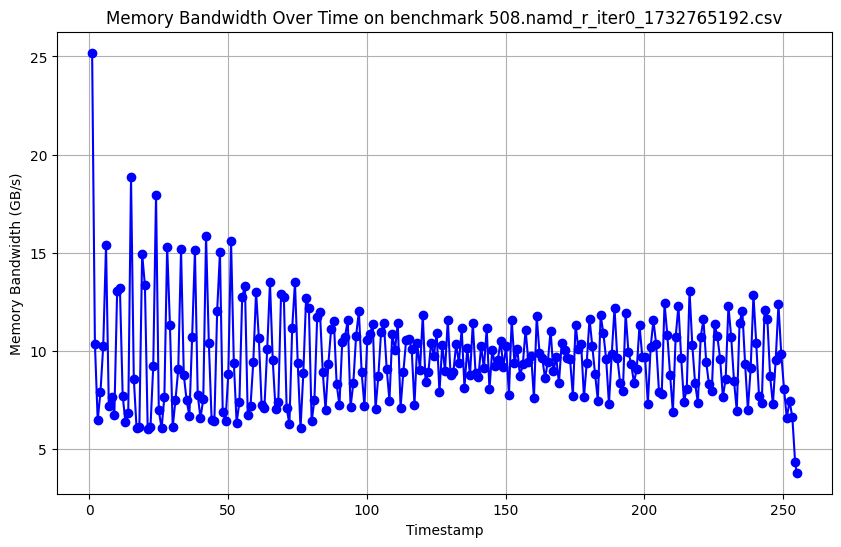

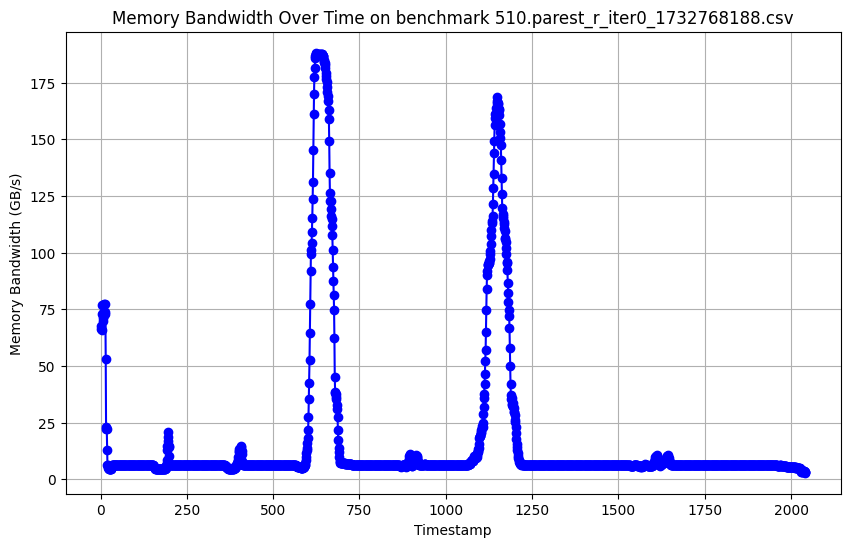

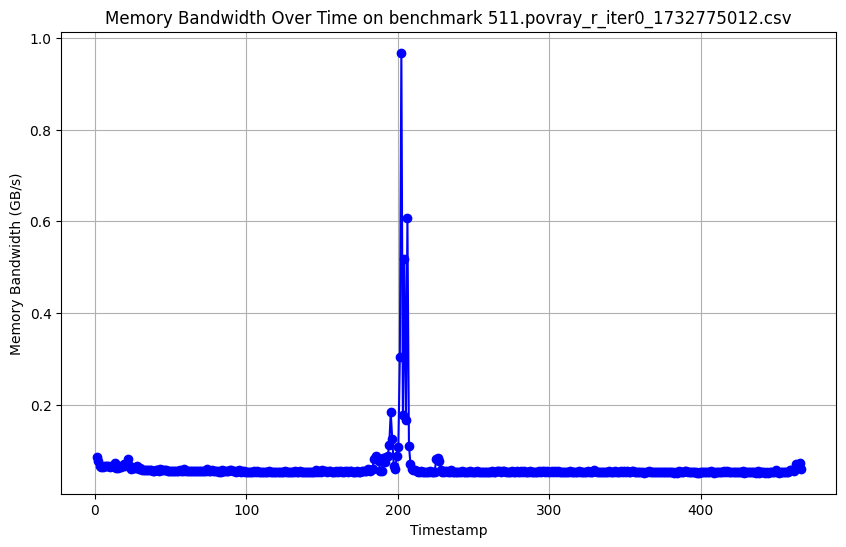

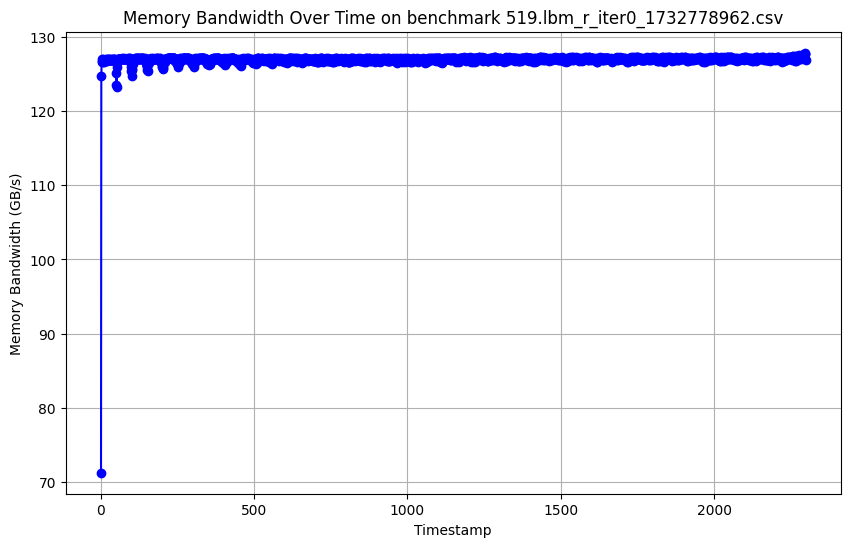

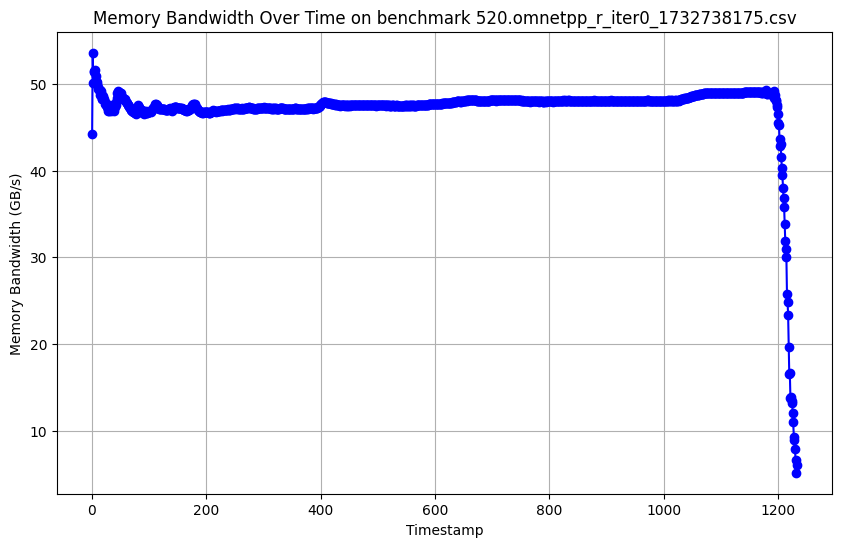

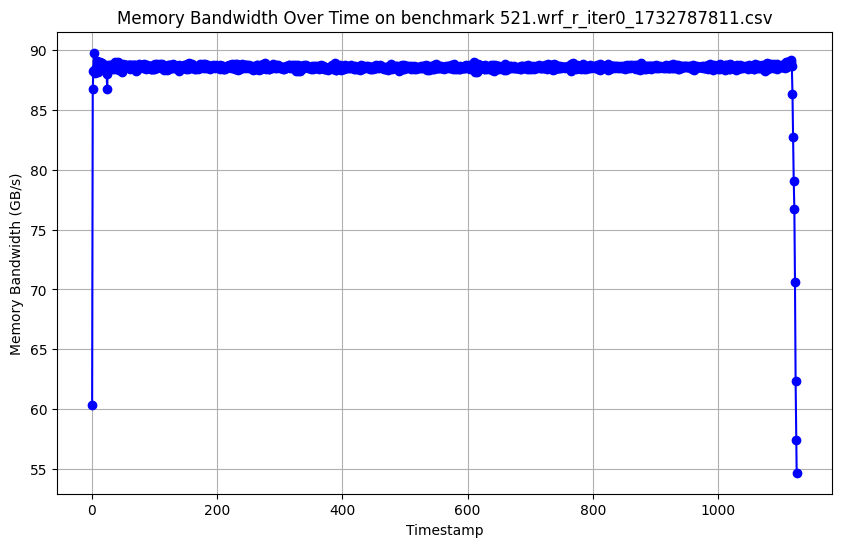

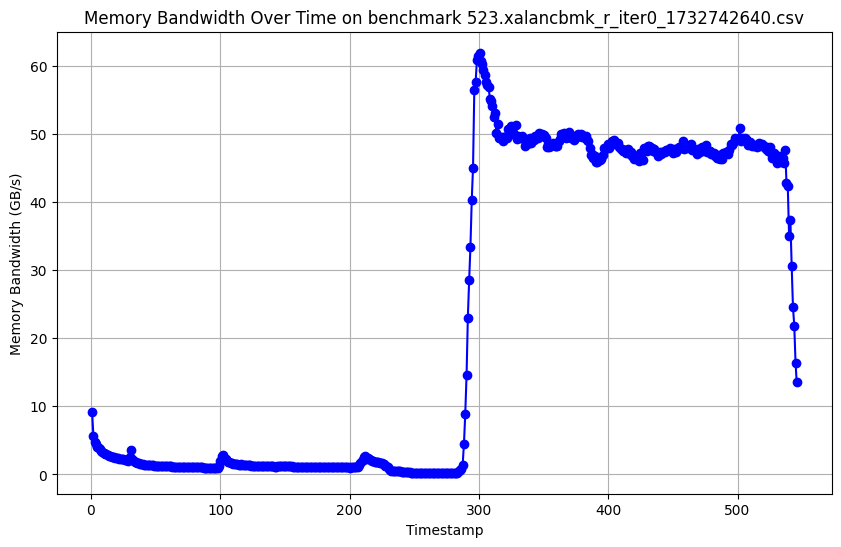

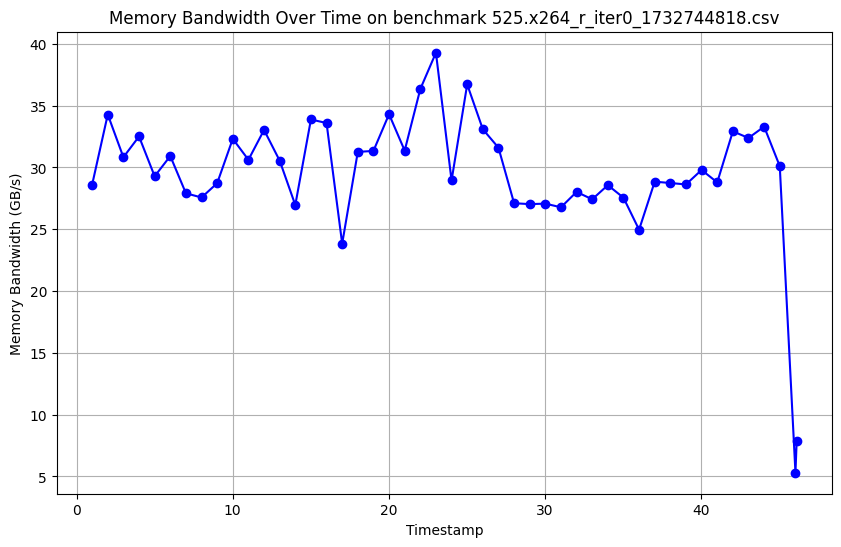

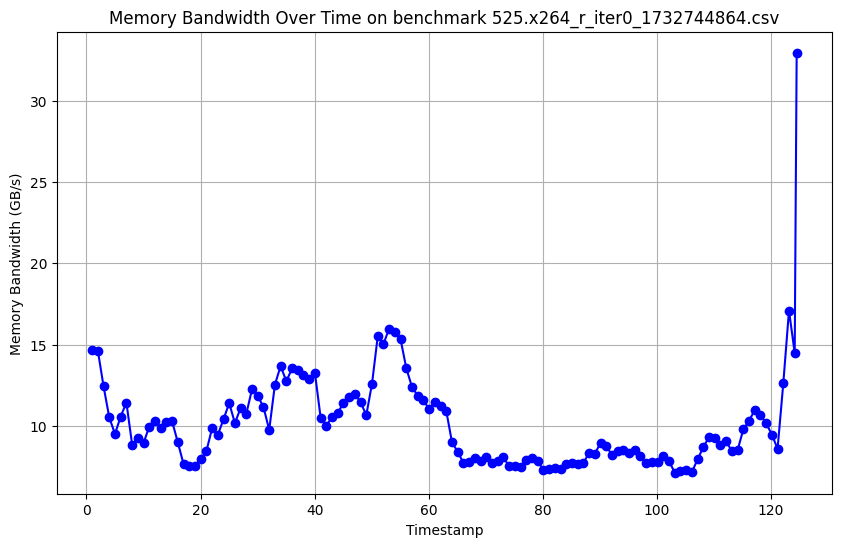

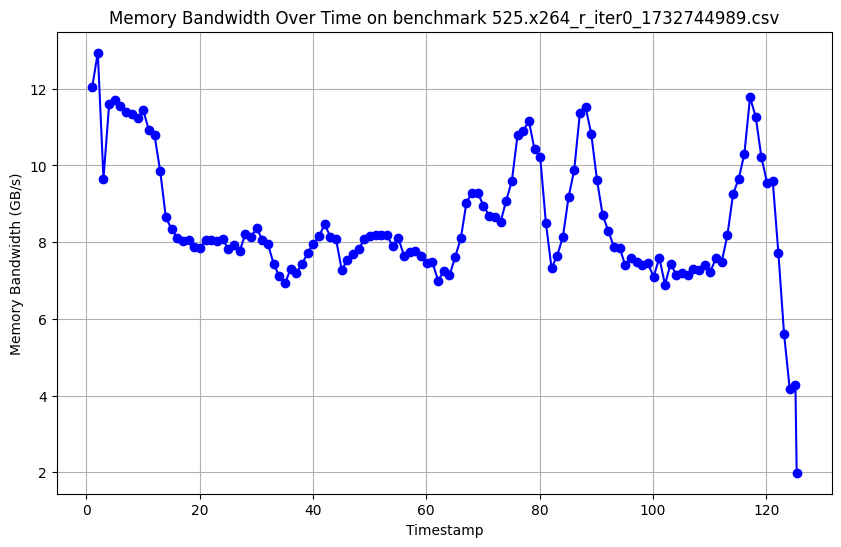

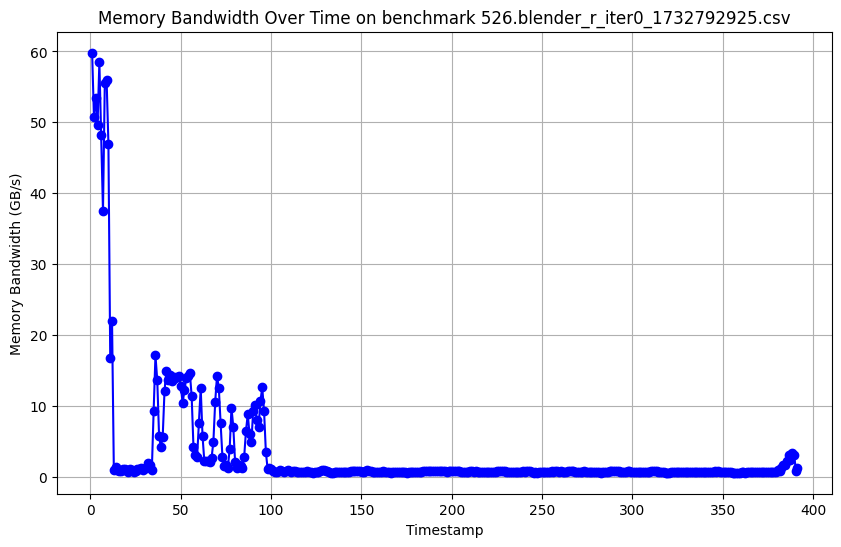

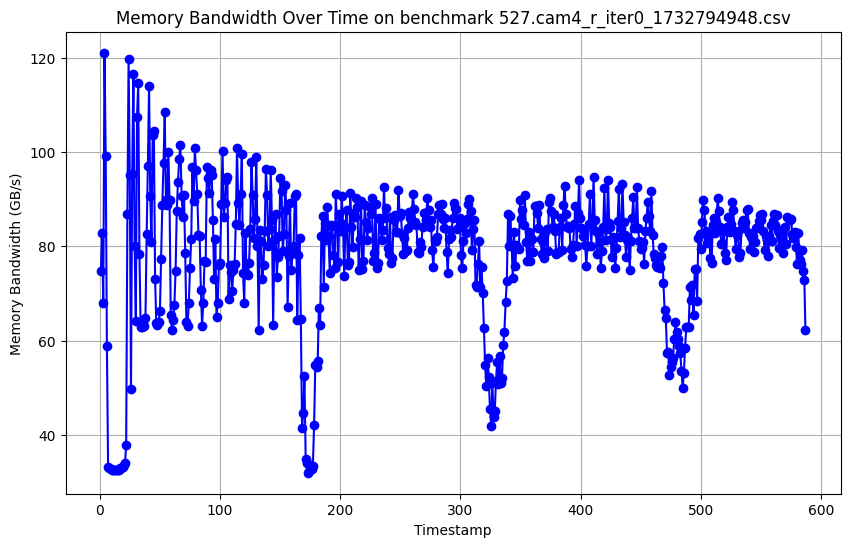

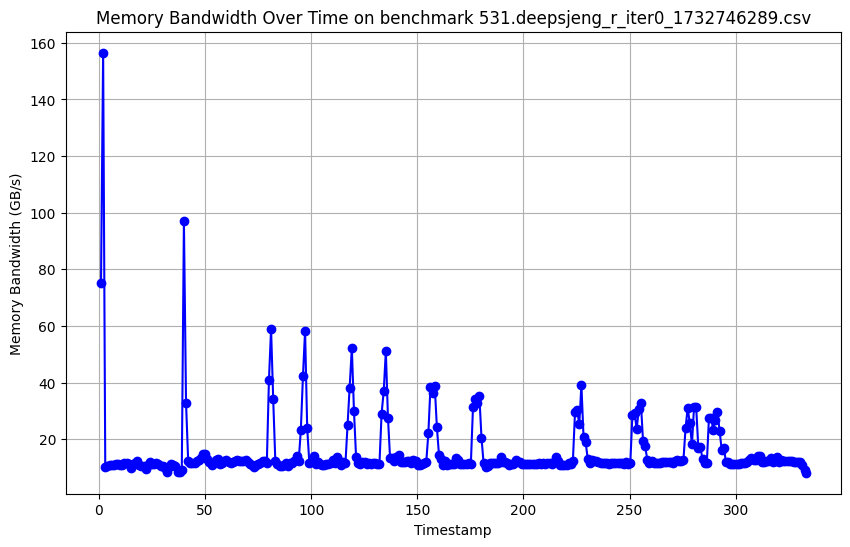

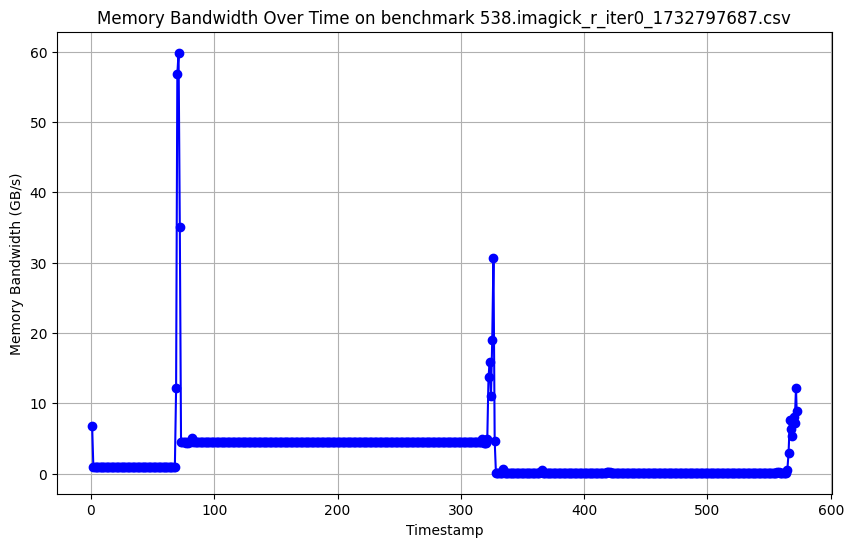

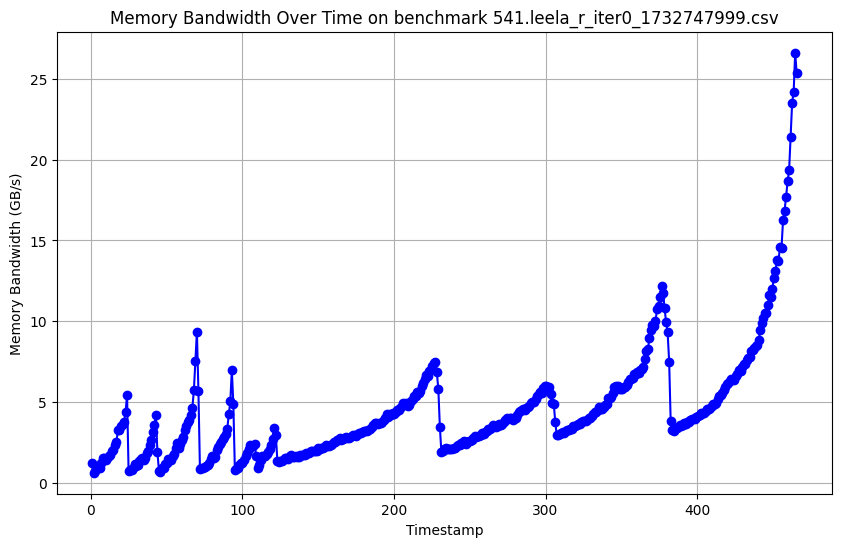

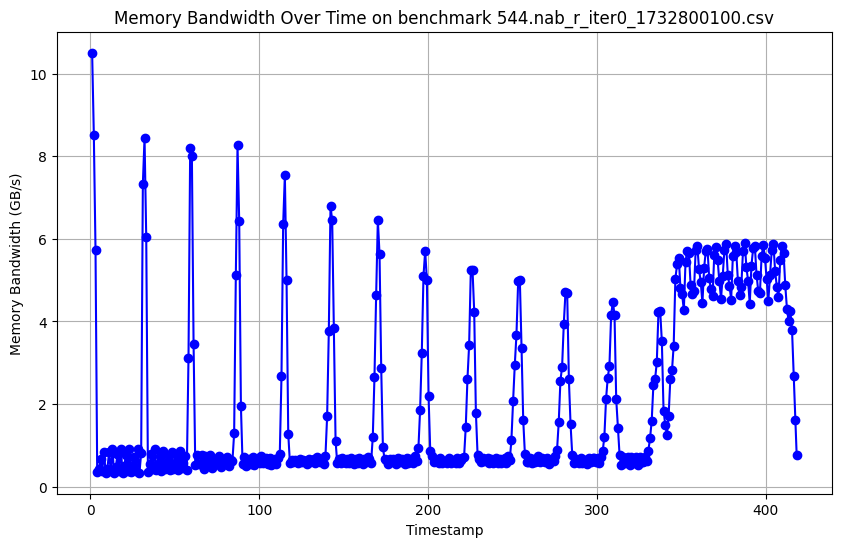

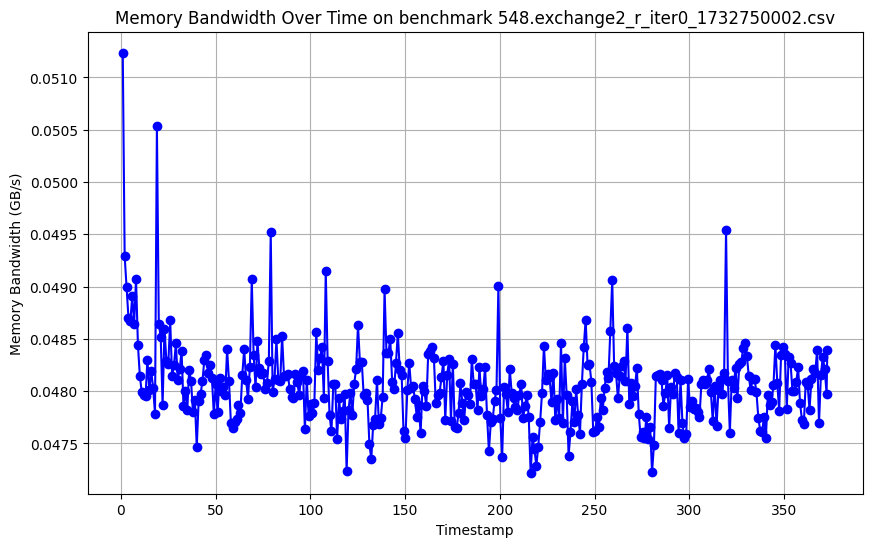

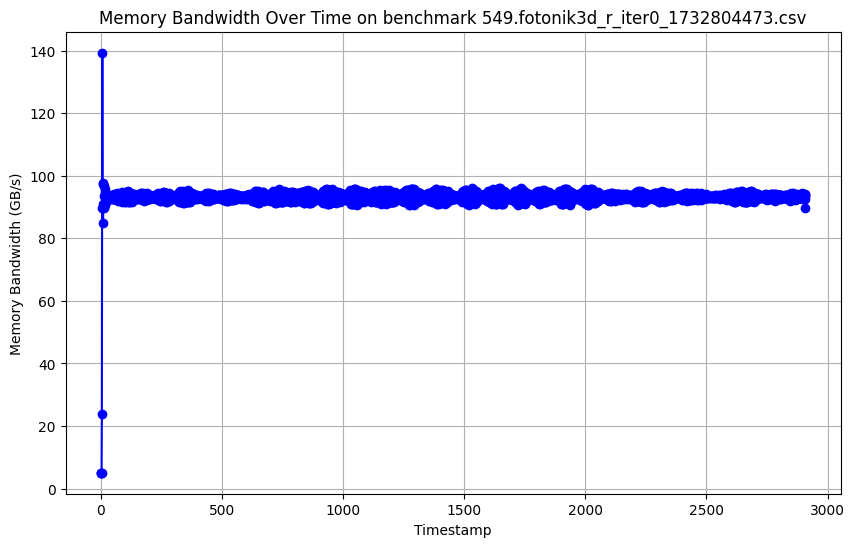

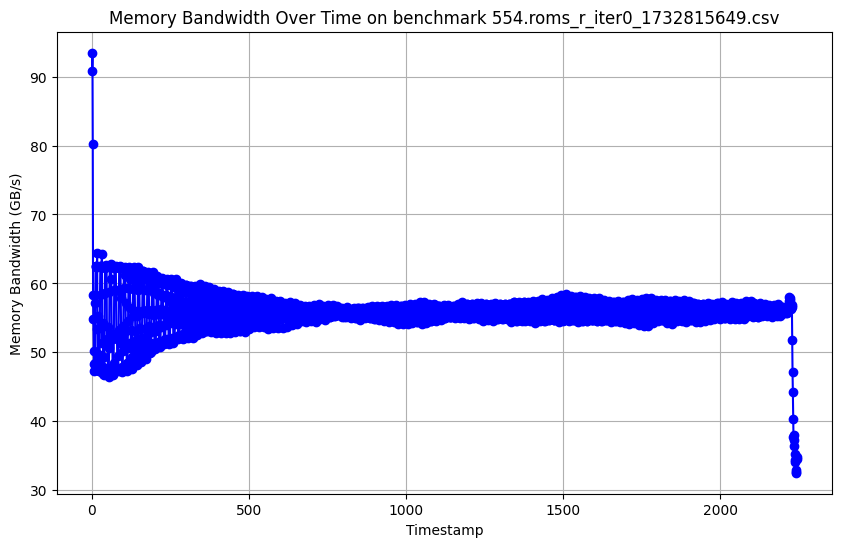

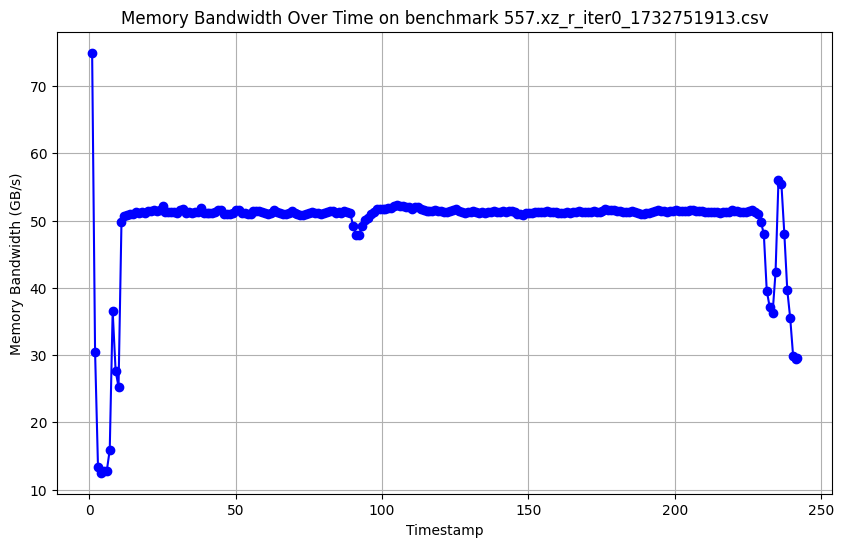

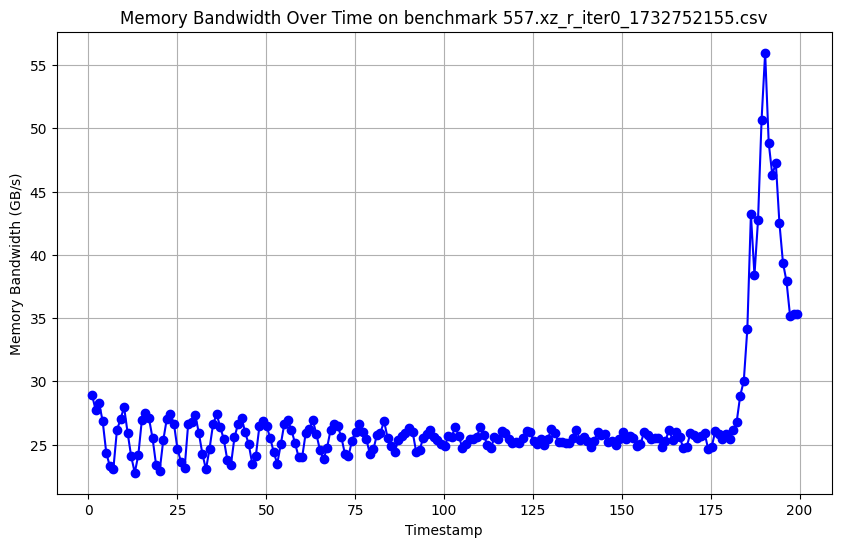

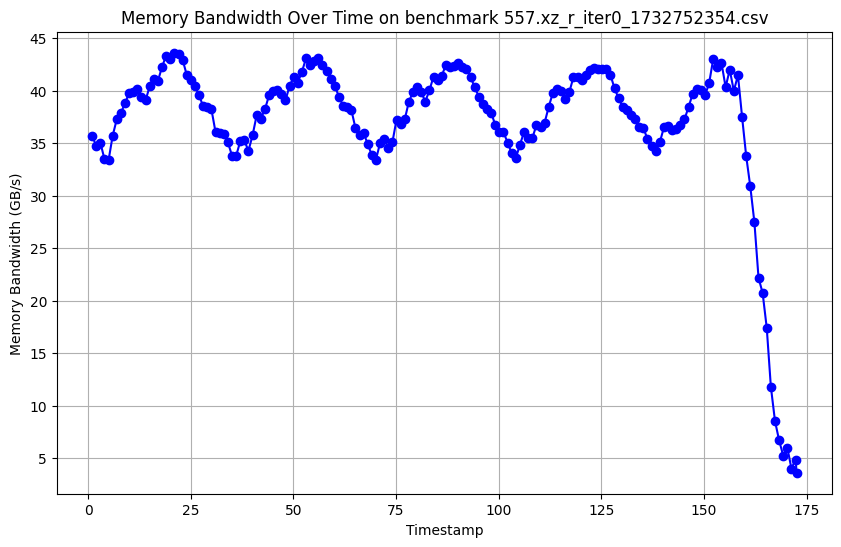

In [ ]:
for data_csv in files:
    perf_raw_path = '../data/csv/dmc_620/' + data_csv
    perf_raw_data = pd.read_csv(perf_raw_path,
                                sep='|',
                                header=None, 
                                names=["timestamp", "value", "event"], 
                                usecols=[0, 1, 3])
    perf_raw_data['type'] = perf_raw_data['event'].apply(
        lambda x: 'read' if x[-2:-1] == '0' else 'write'
    )
    perf_raw_data['device_id'] = perf_raw_data['event'].apply(
        lambda x: x[11:20]
    )
    perf_raw_data['socket'] = perf_raw_data['device_id'].apply(
        lambda x: 0 if x[0] == '1' else '1'
    )
    
    perf_raw_data = perf_raw_data[perf_raw_data["type"] == "write"]
    bw_all = perf_raw_data.groupby(['timestamp']).agg(value=('value', 'sum')).reset_index()

    bw_all['interval'] = bw_all['timestamp'].diff()
    bw_all.loc[0, 'interval'] = bw_all.loc[0, 'timestamp']

    bw_all['memory bandwidth (GB/s)'] = (bw_all['value'] * 64) / (bw_all['interval'] * 1000000000)


    perf_raw_data = perf_raw_data.drop('event', axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(bw_all['timestamp'], bw_all['memory bandwidth (GB/s)'], marker='o', linestyle='-', color='b')
    plt.title('Memory Bandwidth Over Time on benchmark ' + data_csv)
    plt.xlabel('Timestamp')
    plt.ylabel('Memory Bandwidth (GB/s)')
    plt.grid(True)
    plt.savefig(f'../data/images/dmc_620/write/{data_csv + ".png"}')